In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

11490434/11490434 [==============================] - 0s 0us/step
5


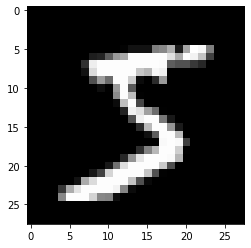

In [2]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]
print(y_train[0])
plt.imshow(train_data[0][0], cmap='gray')

In [3]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#def loss(true, pred):
#    val = 0.
#    for i in range(len(true)):
#        val -= np.log(pred[i, true[i]])
#    return val / len(true)
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


# Question 4.1
We gonna train (784+1)*32 + (32+1)*32 +(32+1)*10 parameters

In [11]:
(784+1)*32+(32+1)*32+(32+1)*10

26506

In [4]:
# untrained model
logits = model(x_train)
np.argmax(logits, 1)[0:100]

array([7, 8, 7, 7, 7, 7, 1, 7, 9, 7, 8, 9, 7, 9, 8, 7, 7, 7, 8, 7, 8, 8,
       7, 7, 8, 7, 8, 8, 7, 7, 9, 8, 8, 7, 7, 8, 8, 9, 8, 7, 9, 7, 7, 7,
       7, 7, 7, 7, 8, 9, 8, 7, 8, 9, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 9,
       7, 8, 8, 7, 8, 7, 7, 8, 9, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 8, 9, 7,
       7, 7, 7, 7, 9, 8, 7, 7, 7, 9, 9, 9])

In [5]:
# what we would like to get
y_train[0:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [6]:
## Computing a stochastic gradient

# Source: https://keras.io/guides/writing_a_training_loop_from_scratch/

# Example of gradient computation using automatic differentiation

x_train_batch = x_train[:8]
y_train_batch = y_train[:8]
with tf.GradientTape() as tape:
        # Run the forward pass of the layer.
        # The operations that the layer applies
        # to its inputs are going to be recorded
        # on the GradientTape.
        logits = model(x_train_batch)  # Logits for this minibatch

        # Compute the loss value for this minibatch.
        loss_value = loss(y_train_batch, logits)

# Use the gradient tape to automatically retrieve
# the gradients of the trainable variables with respect to the loss.
grad = tape.gradient(loss_value, model.trainable_weights)

## Updating weights

def update_weights(model, update):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] + update[i]
    model.set_weights(new_weights)


## Evaluate model
samples_for_evaluation = np.random.randint(0, 10000, 1000)
logits = model(x_train[samples_for_evaluation])
loss(y_train[samples_for_evaluation], logits).numpy()
    

/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2.3394268

# Question 5.1:

In [7]:
# Stochastic gradient algorithm
n, p = x_train.shape
objective_value = []

def sgd(epochs, gamma_0, model=model):
    for epoch in range(epochs):
        loss_list = []
        for i in range(n):
            learning_rate = gamma_0/np.sqrt(i+1)
            j = np.random.randint(n)
            with tf.GradientTape() as tape:
                logits = model(x_train[j, None])
                loss_value = loss(y_train[j], logits)
            
            grad = tape.gradient(loss_value, model.trainable_weights)
            update_component = -np.asarray(grad)*learning_rate
        
            update_weights(model=model, update=update_component)
            if(i%200==0):
                objective_value.append(loss(y_train, model(x_train)))
        
# TO IMPLEMENT

# Question 5.2:
We set initial learning rate to 0.01. gamma_k = gamma_0/sqrt(k+1)

In [8]:
sgd(epochs=1, gamma_0=0.01, model=model)

<ipython-input-7-96ff9465ba65>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  update_component = -np.asarray(grad)*learning_rate


In [9]:
len(objective_value)

300

Text(0.5, 1.0, 'Objective value after every 200 iterations')

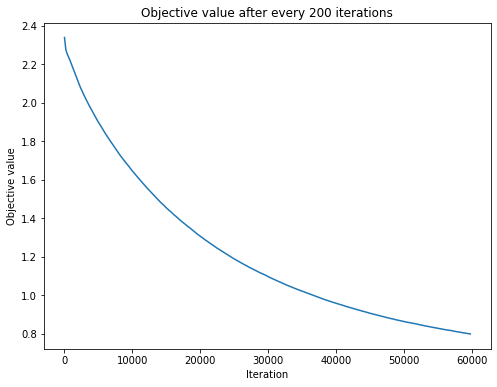

In [25]:
plt.figure(figsize=(8,6))
plt.plot(200*np.arange(len(objective_value)), objective_value)
plt.xlabel('Iteration')
plt.ylabel('Objective value')
plt.title('Objective value after every 200 iterations')

The objective value seem to decrease stably, maybe because we plot the value for every 200 iteration. If we draw it for every iteration, the plot may not be that smooth

# Question 6.1:

In [12]:
model2 = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model2.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
objective_value = []
sgd(epochs=10, gamma_0=0.01, model=model2)

#  Question 6.2:
The mini-batch gradient descent has the advantage of both normal gradient descent and stochastic version. Because each iteration it does not take all of the sample so it computational cost is not as expensive as normal gradient descent, but still utilise the matrix optimization of library. At the same time, with stochastic gradient descent, each iteration only take 1 random sample so after 1 iteration, the objective value may increase, in favor of that sample. Adding batch option will make the objective value decrease more stably. Also, it does not take as much time to complete an epoch, compared to stochastic gradient descent.

# Question 6.3:

In [16]:
model3 = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model3.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [17]:
def mini_batch_gd(epochs, gamma_0, model=model3, batch_size=200):
    for epoch in range(epochs):
        loss_list = []
        for i in range(int(n/batch_size)):
            learning_rate = gamma_0/np.sqrt(i+1)
            j = np.random.randint(n, size=batch_size)
            with tf.GradientTape() as tape:
                logits = model(x_train[j])
                loss_value = loss(y_train[j], logits)
            
            grad = tape.gradient(loss_value, model.trainable_weights)
            update_component = -np.asarray(grad)*learning_rate
        
            update_weights(model=model, update=update_component)
            #if(i%200==0):
            #    objective_value.append(loss(y_train, model(x_train)))
        

In [18]:
mini_batch_gd(epochs=1, gamma_0=0.01, model=model3, batch_size=200)

/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
<ipython-input-17-8f65ae0bc80b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  update_component = -np.asarray(grad)*learning_rate


#Question 7:
We compare the accuracy of model optimized with stochastic gradient descent and mini-batch gradient descent, 1 epoch.

In [23]:
x_test = test_data[0].reshape(-1,784).astype(float) / 255
y_test = test_data[1]

y_train_pred_sgd = np.argmax(model(x_train), axis=1)
y_test_pred_sgd = np.argmax(model(x_test), axis=1)

y_train_pred_bgd = np.argmax(model3(x_train), axis=1)
y_test_pred_bgd = np.argmax(model3(x_test), axis=1)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
print('Evaluate the stochastic gradient descent model')
print('Accuracy on train data: ', accuracy_score(y_train, y_train_pred_sgd))
print('Accuracy on test data: ', accuracy_score(y_test, y_test_pred_sgd))

Evaluate the stochastic gradient descent model
Accuracy on train data:  0.8249
Accuracy on test data:  0.8333


In [24]:
print('Evaluate the mini-batch gradient descent model')
print('Accuracy on train data: ', accuracy_score(y_train, y_train_pred_bgd))
print('Accuracy on test data: ', accuracy_score(y_test, y_test_pred_bgd))

Evaluate the mini-batch gradient descent model
Accuracy on train data:  0.8249
Accuracy on test data:  0.8333


The accuracy of stochastic gradient descent and mini-batch gradient descent is equal. However, stochastic gradient descent method takes longer time to train